In [1]:
import control as control
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# System Analysis and Model Creation

## Data Visualization

In [2]:
Y_true=np.array([5200,5400,5800,5600,5900,5900,6200,6320,6700,8400,9600,10600])
R_true=np.array([406.162,406.162,404.0493,410.9155,406.6901,417.7817,414.0845,427.8169,430.9859,435.7394,440.493,447.8873])

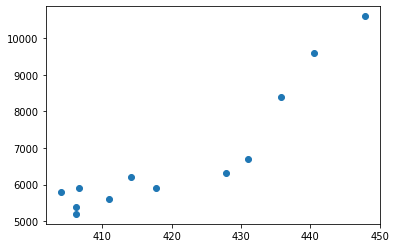

In [3]:
plt.scatter(R_true,Y_true)

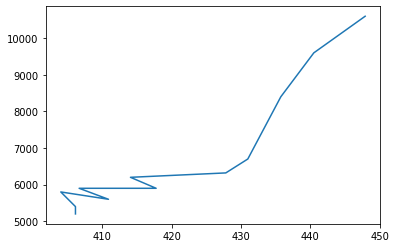

In [4]:
plt.plot(R_true,Y_true)

As observed, there is linear and non-linear part for the causal model of Bread Demand output with Rice Price as input

# Linear Regression for Bread Demand Model with Rice Price as Input for Linear Part

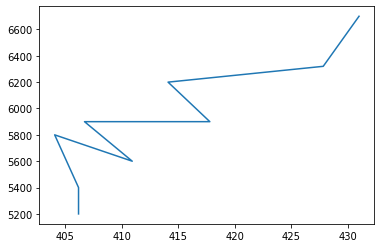

In [5]:
R_true_linear=np.array([406.162,406.162,404.0493,410.9155,406.6901,417.7817,414.0845,427.8169,430.9859])
Y_true_linear=np.array([5200,5400,5800,5600,5900,5900,6200,6320,6700])
plt.plot(R_true_linear,Y_true_linear)

In [6]:
from scipy import stats
x = R_true_linear
y = Y_true_linear
linear_slope, linear_intercept, linear_r_value, linear_p_value, linear_std_err = stats.linregress(x,y)

In [7]:
linear_r_value**2

0.6950358328589681

# First Order Differential Equation Approximation for Bread Demand Model with Rice Price as Input for Non-Linear Part

Nonlinearity of the price is assumed to be stuck at a point due to demand resistance stochastic process, this process is calculated by observing correlation of $\frac {dY_{i}}{dR} $ (forward gradient) with $ Y_i $ (current demand of interest)

In [8]:
R_true_non=np.array([430.9859,435.7394,440.493,447.8873])
Y_true_non=np.array([6700,8400,9600,10600])
dydr=np.zeros(len(R_true_non)-1)
for i in range (len(R_true_non)-1):
    dydr[i]=(Y_true_non[i+1]-Y_true_non[i])/(R_true_non[i+1]-R_true_non[i])

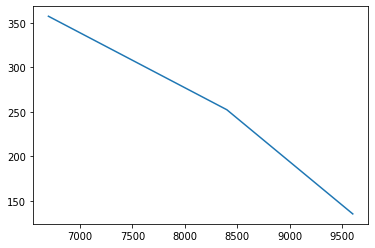

In [9]:
Y_i=np.array([6700,8400,9600])
plt.plot(Y_i,dydr)

In [10]:
from scipy import stats
x = Y_i
y = dydr
non_linear_slope, non_linear_intercept, non_linear_r_value, non_linear_p_value, non_linear_std_err = stats.linregress(x,y)

In [11]:
non_linear_r_value**2

0.9830958029292611

It is observed that the correlation of $ \frac {dY}{dR} $ with $ Y_i $ is linear with $ r^2 $ value of 0.983, therefore linear regression to find a stochastic gradient for the process is a great model for a given $Y_i$

In [13]:
A=non_linear_slope

In [14]:
B=non_linear_intercept

For this stochastic process, it is legal to create a non-linear model of $ \frac {dY}{dR} $ where the minimum is 0. This is due to the boundary condition where causality of the price raise increase the probability of the demand to increase, rather than decrease.

Take $Y$ as Bread Demand Output and $R$ as Rice Price Input Where $\frac {dY}{dR} = AY + B $ (linear regression on the demand change over change on price) with minimum of zero (non-linear)

In [15]:
def dydr(y,R,A,B):
    if((A*y+B)<0):
        result = 0
    else:
        result=A*y+B
    return result

# Model Testing

In [16]:
Y_predicted=np.zeros(len(R_true))

## Linear Part

In [17]:
def Y_predicted_linear(R):
    return linear_slope*R+linear_intercept

In [18]:
for i in range (0,len(R_true_linear)-1):
    Y_predicted[i]=Y_predicted_linear(R_true_linear[i])

## Non-linear Part

In [36]:
def Y_predicted_non_linear(Y0,R,A,B):
    yp=odeint(dydr,y0=Y0,t=R,args=(A,B))
    return yp

In [37]:
for i in range (0,len(R_true_non)):
    Y_predicted[len(R_true_linear)-1+i]=Y_predicted_non_linear(6700,R_true_non,A,B)[i]

In [38]:
Y_predicted

array([ 5587.58563368,  5587.58563368,  5504.17281641,  5775.26151141,
        5608.43587687,  6046.35020642,  5900.37876323,  6442.55615324,
        6700.        ,  8155.20606759,  9170.65514332, 10175.64640431])

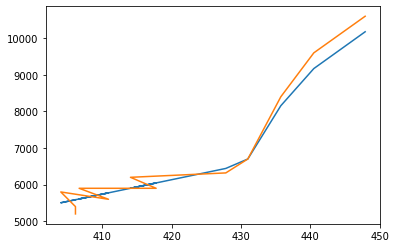

In [39]:
plt.plot(R_true,Y_predicted)
plt.plot(R_true,Y_true)

In [40]:
import statistics
Y_preddev=(abs(Y_true-Y_predicted))**2
Y_stddev=(abs(Y_true-statistics.mean(Y_true)))**2
rsquared=(sum(Y_stddev)-sum(Y_preddev))/sum(Y_stddev)

In [41]:
rsquared

0.9723930332144516

## Predictive Analytics

After getting a nice model with 0.97 $ r^2 $, time to test the response afterwards using data predicted through holtz method of rice price

In [42]:
R_predicted=np.array([446.6279,453.2656,459.2221,465.1786,471.1351,477.0916,483.0481,489.0046,494.9611,500.9177,506.8742,512.8307,518.7872])
Y_predicted_new=np.zeros(len(R_predicted))
for i in range (0,len(R_predicted)):
    Y_predicted_new[i]=Y_predicted_non_linear(10175.6464043,R_predicted,A,B)[i]

In [43]:
Y_predicted_new

array([10175.6464043 , 10704.7397256 , 10998.90983932, 11186.3125309 ,
       11305.69826171, 11381.75351548, 11430.20487165, 11461.07101663,
       11480.73443089, 11493.26127935, 11501.24138246, 11506.32513963,
       11509.56377147])

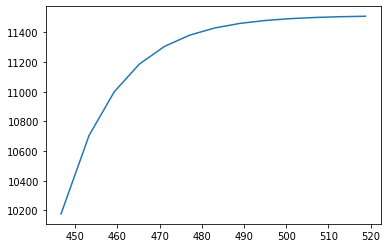

In [44]:
plt.plot(R_predicted,Y_predicted_new)

## Final Model with Predictive Capability of System Response

In [45]:
Y_predicted_final=np.concatenate((Y_predicted,Y_predicted_new))

In [46]:
Y_predicted_final

array([ 5587.58563368,  5587.58563368,  5504.17281641,  5775.26151141,
        5608.43587687,  6046.35020642,  5900.37876323,  6442.55615324,
        6700.        ,  8155.20606759,  9170.65514332, 10175.64640431,
       10175.6464043 , 10704.7397256 , 10998.90983932, 11186.3125309 ,
       11305.69826171, 11381.75351548, 11430.20487165, 11461.07101663,
       11480.73443089, 11493.26127935, 11501.24138246, 11506.32513963,
       11509.56377147])

In [47]:
R_predicted_final=np.concatenate((R_true,R_predicted))

In [48]:
R_predicted_final

array([406.162 , 406.162 , 404.0493, 410.9155, 406.6901, 417.7817,
       414.0845, 427.8169, 430.9859, 435.7394, 440.493 , 447.8873,
       446.6279, 453.2656, 459.2221, 465.1786, 471.1351, 477.0916,
       483.0481, 489.0046, 494.9611, 500.9177, 506.8742, 512.8307,
       518.7872])

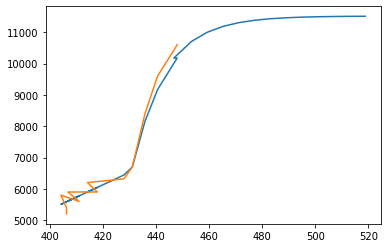

In [50]:
plt.plot(R_predicted_final,Y_predicted_final)
plt.plot(R_true,Y_true)